In [0]:
from fastai.vision import *

Setting up the folder and file location to read list of URLs

In [0]:
folder = 'forest'
file = 'forest.csv'

In [0]:
path = Path('data/landscapes')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [5]:
url="https://raw.githubusercontent.com/atulshah16/DeepLearningCMP258/master/homework1/datasets/forest.csv"
data=pd.read_csv(url)

data.to_csv(path/file, index=False, encoding='utf-8')
download_images(path/file, dest, max_pics=200, max_workers=0)


In [0]:
folder = 'mountains'
file = 'mountains.csv'

In [0]:
path = Path('data/landscapes')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)


In [8]:
url="https://raw.githubusercontent.com/atulshah16/DeepLearningCMP258/master/homework1/datasets/mountains.csv"
data=pd.read_csv(url)

data.to_csv(path/file, index=False, encoding='utf-8')
download_images(path/file, dest, max_pics=200, max_workers=0)


In [0]:
folder = 'rivers'
file = 'rivers.csv'

In [0]:
path = Path('data/landscapes')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [11]:
url="https://raw.githubusercontent.com/atulshah16/DeepLearningCMP258/master/homework1/datasets/rivers.csv"
data=pd.read_csv(url)

data.to_csv(path/file, index=False, encoding='utf-8')
download_images(path/file, dest, max_pics=200, max_workers=0)


In [0]:
classes = ['forest','rivers','mountains']

In [13]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

forest


rivers


mountains


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [15]:
data.classes

['forest', 'mountains', 'rivers']

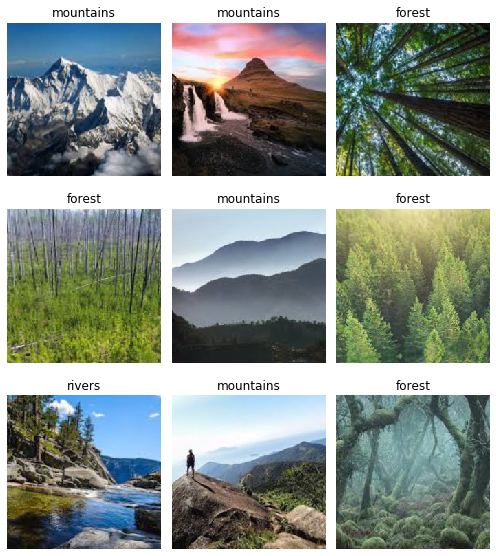

In [16]:
data.show_batch(rows=3, figsize=(7,8))

In [17]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['forest', 'mountains', 'rivers'], 3, 240, 60)

## Train model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [19]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.486892,3.069790,0.633333,00:04
1,0.974020,1.216496,0.216667,00:03
2,0.768173,0.841085,0.200000,00:03
3,0.652251,0.595187,0.200000,00:03


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


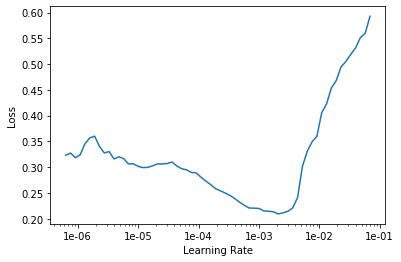

In [23]:

learn.recorder.plot()

In [24]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.270330,0.564502,0.183333,00:03
1,0.277928,0.448680,0.183333,00:03


In [0]:
learn.save('stage-2')

## Interpretation

In [0]:
learn.load('stage-2');

In [27]:
interp = ClassificationInterpretation.from_learner(learn)

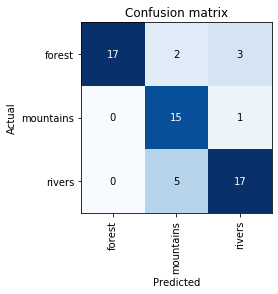

In [28]:
interp.plot_confusion_matrix()

## Pruning images which are wrongly classified


In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [32]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [33]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


##Exporting model

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

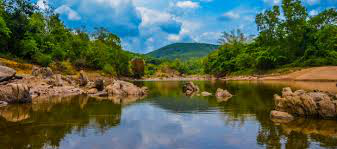

In [36]:
img = open_image(path/'rivers'/'00000005.jpg')
img

In [0]:
learn = load_learner(path)

In [38]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category rivers

### Learning rate (LR) experimenting

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [40]:
learn.fit_one_cycle(1, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,7.010857,338236702720.000000,0.633333,00:03


### Learning rate (LR) too low

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [42]:
learn.fit_one_cycle(5, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,1.863377,1.725972,0.650000,00:03
1,1.837014,1.617630,0.700000,00:03
2,1.868529,1.584973,0.700000,00:03
3,1.862090,1.525996,0.683333,00:03
4,1.848836,1.493994,0.650000,00:03


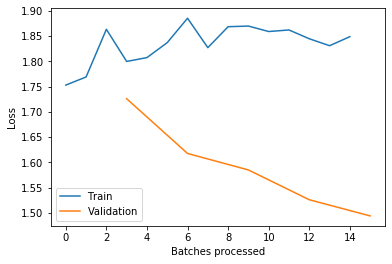

In [43]:
learn.recorder.plot_losses()